In [ ]:
pip install scikeras -q

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_wine
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from scikeras.wrappers import KerasRegressor
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#Ejercicio 1

In [ ]:
df = load_wine()
y = df.target
x = pd.DataFrame(df.data)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
#No cross validation
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3, stratify=y,random_state=1)
clf = MLPClassifier(hidden_layer_sizes=(20,20), activation='relu', solver='adam',
                    alpha=0.001, batch_size='auto', learning_rate='constant',
                    learning_rate_init=0.001, power_t=0.5, max_iter=300,
                    shuffle=True, random_state=None).fit(X_train, y_train)
clf.predict_proba(X_test[:1])

array([[0.01894062, 0.77400492, 0.20705446]])

In [ ]:
pred = clf.predict(X_test)
pred

array([1, 1, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 1, 2, 1, 0, 2, 0, 1,
       1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 2, 1, 1, 1, 0, 2, 0, 0,
       1, 2, 0, 1, 2, 0, 1, 0, 0, 2])

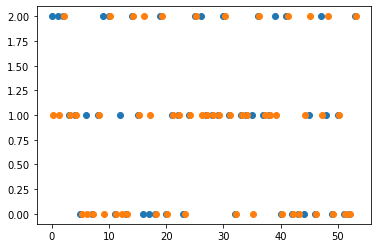

In [ ]:
n = list(range(len(pred)))
n2 = []
for i in range(len(n)):
  n2.append(n[i]+.2)
plt.scatter(n, y_test)
plt.scatter(n2, pred)

In [ ]:
clf.score(X_test, y_test)

0.7407407407407407

Primero al probar el modelo sin ningun tipo de cross-validation y con dos capas ocultas de 20 neuronas se obtuvo un resultado del 38.88% de precision.



[0.8888888888888888, 0.8888888888888888, 0.4722222222222222, 0.3142857142857143, 0.8857142857142857]


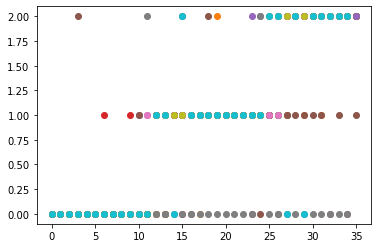

In [ ]:
#Cross validation K-fold
kf = KFold(n_splits=5, shuffle = True)
scores = []
for train, test in kf.split(x):
  X_train2, X_test2 = x.iloc[train], x.iloc[test]
  y_train2, y_test2 = y[train], y[test]
  clf = MLPClassifier(hidden_layer_sizes=(20,20), activation='relu', solver='adam',
                    alpha=0.001, batch_size='auto', learning_rate='constant',
                    learning_rate_init=0.001, power_t=0.5, max_iter=300,
                    shuffle=True, random_state=None).fit(X_train2, y_train2)
  pred2 = clf.predict(X_test2)
  n = list(range(len(pred2)))
  plt.scatter(n, y_test2)
  plt.scatter(n, pred2)
  scores.append(clf.score(X_test2, y_test2))
print(scores)

In [ ]:
print('Score promedio:',sum(scores)/len(scores))

Score promedio: 0.69


Utilizando el metodo de k-fold para la validacion cruzada, el modelo aumento a una precision del 41.3%.

In [ ]:
scores_list = []
f = 0
for train, test in kf.split(x):
  f += 1
  X_train2, X_test2 = x.iloc[train], x.iloc[test]
  y_train2, y_test2 = y[train], y[test]
  print('Split',f)
  layers = []
  scores = []
  for i in range(4,104,4):
    layers.append(20)
    clf = MLPClassifier(hidden_layer_sizes=(layers), activation='relu', solver='adam',
                      alpha=0.001, batch_size='auto', learning_rate='constant',
                      learning_rate_init=0.001, power_t=0.5, max_iter=300,
                      shuffle=True, random_state=None).fit(X_train2, y_train2)
    print("Score:",round(clf.score(X_test2, y_test2),3), " Numero de capas:", i)
    scores.append(round(clf.score(X_test2, y_test2),3))
  scores_list.append(scores)

Split 1
Score: 0.306  Numero de capas: 4
Score: 0.583  Numero de capas: 8
Score: 0.778  Numero de capas: 12
Score: 0.806  Numero de capas: 16
Score: 0.861  Numero de capas: 20
Score: 0.861  Numero de capas: 24
Score: 0.944  Numero de capas: 28
Score: 0.722  Numero de capas: 32
Score: 0.861  Numero de capas: 36
Score: 0.611  Numero de capas: 40
Score: 0.722  Numero de capas: 44
Score: 0.722  Numero de capas: 48
Score: 0.694  Numero de capas: 52
Score: 0.667  Numero de capas: 56
Score: 0.667  Numero de capas: 60
Score: 0.667  Numero de capas: 64
Score: 0.722  Numero de capas: 68
Score: 0.722  Numero de capas: 72
Score: 0.722  Numero de capas: 76
Score: 0.667  Numero de capas: 80
Score: 0.667  Numero de capas: 84
Score: 0.722  Numero de capas: 88
Score: 0.694  Numero de capas: 92
Score: 0.722  Numero de capas: 96
Score: 0.583  Numero de capas: 100
Split 2
Score: 0.472  Numero de capas: 4
Score: 0.389  Numero de capas: 8
Score: 0.611  Numero de capas: 12
Score: 0.778  Numero de capas: 16
S

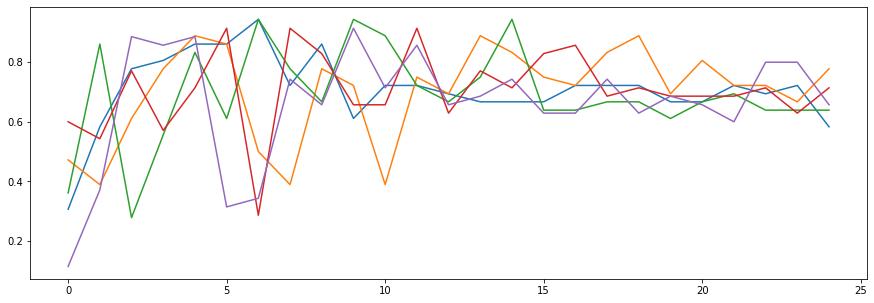

In [ ]:
plt.figure(figsize=(15, 5))
for i in range(0,len(scores_list)):
  plt.plot(scores_list[i])
plt.show()

En este segundo ejercicio al variar el numero maximo de iteraciones entre 4 y 100 para cada uno de los k-folds, se puede ver que alrededor de las 24 iteraciones empieza a tener menos variacion el modelo, rondando el 80% de precision, pero conforme se siguen aumentando las interaciones se puede ver que el porcentaje desciende un poco.

In [ ]:
m = 0.00001
for i in range(0,7):
  m = m * 10
  clf = MLPClassifier(hidden_layer_sizes=(20,20,20,20,20), activation='relu', solver='adam',
                    alpha=m, batch_size='auto', learning_rate='constant',
                    learning_rate_init=0.001, power_t=0.5, max_iter=5000,
                    shuffle=True, random_state=None).fit(X_train2, y_train2)
  print("Score:",round(clf.score(X_test2, y_test2),3), "Término de regularización:", m)

Score: 0.771 Término de regularización: 0.0001
Score: 0.886 Término de regularización: 0.001
Score: 0.886 Término de regularización: 0.01
Score: 0.886 Término de regularización: 0.1
Score: 0.886 Término de regularización: 1.0
Score: 0.629 Término de regularización: 10.0
Score: 0.743 Término de regularización: 100.0


En este ejemplo al estar cambiando el termino de regularizacion, el valor de 0.001 fue el que tuvo el mejor rendimiento, pues al ser mas pequeño hay menos penalizacion al sobreajuste y se produce asi un mejor resultado, pero al aumentar el valor de penalizacion el resultado de score empeora pero a cambio el modelo es mas general.

#Ejercicio 2

In [ ]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/Shareddrives/Redes neuronales/data/misterious_data_5.txt', sep='\s', header = None)
df
df.head()

Mounted at /content/drive


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0,8.650000,0.507095,4.410643,2.186973,1.024927,-0.129390,-0.934882,4.844097,0.141823,0.292197,4.797127,26.790544,10.779272,1.630983,8.577229,1.714322,1.708571
1,1.0,5.986667,0.437240,4.796872,1.816601,0.737577,0.961884,1.738542,5.762690,0.213717,0.756701,4.536075,20.669289,22.196431,9.052902,34.362672,-0.055559,-0.871881
2,2.0,5.400000,0.590097,3.272865,1.552972,0.298558,0.303162,0.851488,13.885132,2.498995,14.450581,1.365751,0.595322,6.077656,0.929357,2.791653,1.617718,1.241940
3,1.0,10.653333,0.439906,5.106043,2.416150,1.147192,0.023358,-0.758841,12.330952,1.027062,7.091965,2.704944,6.299525,22.625464,8.696092,66.604375,0.223827,-1.535839
4,1.0,7.330000,0.346152,4.875915,1.868154,1.100352,0.596716,-0.537479,10.120684,0.692666,3.137352,3.006618,8.894896,8.742954,1.402263,5.290531,1.545937,1.176913


In [ ]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]
x.shape

(849, 17)

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(activation='relu', solver='adam', max_iter = 100)
parameter_space = {
    'hidden_layer_sizes': [(20), (20, 20), (20, 20, 20), (20, 20, 20, 20), (20, 20, 20, 20, 20)],
    'alpha': [.0001, .0005, .001, .005, .01, .05, .1, .5]
}

grid = GridSearchCV(mlp, parameter_space, n_jobs=1, cv=3, scoring='neg_mean_squared_error')
grid_result = grid.fit(x, y)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -4431.847884 using {'alpha': 0.1, 'hidden_layer_sizes': (20, 20, 20, 20, 20)}
-28537.256037 (976.110287) with: {'alpha': 0.0001, 'hidden_layer_sizes': 20}
-26307.071347 (1169.294661) with: {'alpha': 0.0001, 'hidden_layer_sizes': (20, 20)}
-23521.489796 (3080.257687) with: {'alpha': 0.0001, 'hidden_layer_sizes': (20, 20, 20)}
-5762.574003 (1337.254849) with: {'alpha': 0.0001, 'hidden_layer_sizes': (20, 20, 20, 20)}
-4698.289745 (472.650534) with: {'alpha': 0.0001, 'hidden_layer_sizes': (20, 20, 20, 20, 20)}
-28570.270687 (1062.628348) with: {'alpha': 0.0005, 'hidden_layer_sizes': 20}
-27587.713929 (1050.922122) with: {'alpha': 0.0005, 'hidden_layer_sizes': (20, 20)}
-20414.287968 (2689.025522) with: {'alpha': 0.0005, 'hidden_layer_sizes': (20, 20, 20)}
-9722.638356 (3808.531183) with: {'alpha': 0.0005, 'hidden_layer_sizes': (20, 20, 20, 20)}
-4620.813215 (252.755008) with: {'alpha': 0.0005, 'hidden_layer_sizes': (20, 20, 20, 20, 20)}
-28600.478739 (1057.724030) with: {'alpha': 0.0

En este ejercicio la busqueda de hiperparametros con gridsearch hace que el tiempo de ejecucion aumente considerablemente, pero nos ayuda a obtener los parametros perfectos para el modelo. Los cuales en este caso fueron: 5 capas ocultas de 20 neuronas cada con un alpha de .1. Es importante notar en primer lugar que el error utilizado es el error cuadrático medio negativo, esto por motivos técnicos de la librería de sklearn. Otra cosa a notar es que el ejercicio se realizó con tan solo 5 capas ocultas, cada una de 20 neuronas, por lo que no se realizó una gran variabilidad en estos parámetros. Esto se debe a que los tiempos de ejecución incrementan considerablemente al aumentar más capas y parámetros al gridsearch. 

#Ejercicio 3

In [ ]:
from sklearn.neural_network import MLPRegressor
df = load_diabetes()
y = df.target
x = pd.DataFrame(df.data)
x.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [ ]:
y[0:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3,random_state=1)
clf = MLPRegressor(hidden_layer_sizes=(20,20,20,20), activation='relu', solver='adam',
                    alpha=.001, batch_size='auto', learning_rate='constant',
                    learning_rate_init=.05, power_t=0.5, max_iter=300,
                    shuffle=True, random_state=None).fit(X_train, y_train)
pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.3620307017406331

In [ ]:
scores_list = []
j = 0
for train, test in kf.split(x):
  j += 1
  X_train, X_test = x.iloc[train], x.iloc[test]
  y_train, y_test = y[train], y[test]
  print('Split',j)
  epoch = 0
  scores = []
  for i in range(10,210,10):
    epoch += 5
    clf = MLPRegressor(hidden_layer_sizes=(20,20,20,20,20), activation='relu', solver='adam',
                      alpha=0.001, batch_size='auto', learning_rate='constant',
                      learning_rate_init=0.005, power_t=0.5, max_iter=epoch,
                      shuffle=True, random_state=None).fit(X_train, y_train)
    print("Score:",round(clf.score(X_test, y_test),3), " Numero de epocas:", i)
    scores.append(round(clf.score(X_test, y_test),3))
  scores_list.append(scores)

Split 1
Score: -4.286  Numero de epocas: 10
Score: -3.73  Numero de epocas: 20
Score: -3.47  Numero de epocas: 30
Score: 0.065  Numero de epocas: 40
Score: 0.022  Numero de epocas: 50
Score: 0.164  Numero de epocas: 60
Score: 0.239  Numero de epocas: 70
Score: 0.288  Numero de epocas: 80
Score: 0.311  Numero de epocas: 90
Score: 0.379  Numero de epocas: 100
Score: 0.411  Numero de epocas: 110
Score: 0.424  Numero de epocas: 120
Score: 0.481  Numero de epocas: 130
Score: 0.51  Numero de epocas: 140
Score: 0.462  Numero de epocas: 150
Score: 0.501  Numero de epocas: 160
Score: 0.514  Numero de epocas: 170
Score: 0.516  Numero de epocas: 180
Score: 0.538  Numero de epocas: 190
Score: 0.526  Numero de epocas: 200
Split 2
Score: -3.94  Numero de epocas: 10
Score: -3.832  Numero de epocas: 20
Score: -3.09  Numero de epocas: 30
Score: -0.691  Numero de epocas: 40
Score: 0.166  Numero de epocas: 50
Score: 0.374  Numero de epocas: 60
Score: 0.403  Numero de epocas: 70
Score: 0.376  Numero de ep

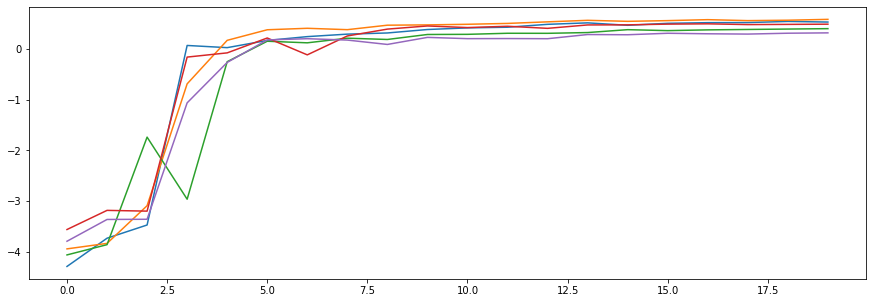

In [ ]:
plt.figure(figsize=(15, 5))
for i in range(0,len(scores_list)):
  plt.plot(scores_list[i])
plt.show()

En este problema de regresion no se pudo obtener un resultado mayor al 50%, pero esto es debido a que la regresion es mas dificil que la clasificacion al tener mas varianza entre los datos. En cuanto a la convergencia este modelo lo hizo de manera muy rapida, pues despues de las 30 iteraciones deja de haber una mejora considerable en el rendimiento.

In [ ]:
scores_list = []
j = 0
for train, test in kf.split(x):
  j += 1
  X_train, X_test = x.iloc[train], x.iloc[test]
  y_train, y_test = y[train], y[test]
  print('Split',j)
  batch = 0
  scores = []
  for i in range(10,210,10):
    batch += 10
    clf = MLPRegressor(hidden_layer_sizes=(20,20,20,20,20), activation='relu', solver='adam',
                      alpha=0.001, batch_size=batch, learning_rate='constant',
                      learning_rate_init=0.05, power_t=0.5, max_iter=150,
                      shuffle=True, random_state=None).fit(X_train, y_train)
    print("Score:",round(clf.score(X_test, y_test),3), " Tamaño de lote:", i)
    scores.append(round(clf.score(X_test, y_test),3))
  scores_list.append(scores)

Split 1
Score: 0.421  Tamaño de lote: 10
Score: 0.422  Tamaño de lote: 20
Score: 0.174  Tamaño de lote: 30
Score: 0.418  Tamaño de lote: 40
Score: 0.387  Tamaño de lote: 50
Score: 0.352  Tamaño de lote: 60
Score: 0.219  Tamaño de lote: 70
Score: 0.363  Tamaño de lote: 80
Score: 0.425  Tamaño de lote: 90
Score: 0.438  Tamaño de lote: 100
Score: 0.426  Tamaño de lote: 110
Score: 0.393  Tamaño de lote: 120
Score: 0.437  Tamaño de lote: 130
Score: 0.373  Tamaño de lote: 140
Score: 0.448  Tamaño de lote: 150
Score: 0.36  Tamaño de lote: 160
Score: 0.395  Tamaño de lote: 170
Score: 0.346  Tamaño de lote: 180
Score: 0.406  Tamaño de lote: 190
Score: 0.38  Tamaño de lote: 200
Split 2
Score: 0.413  Tamaño de lote: 10
Score: 0.508  Tamaño de lote: 20
Score: 0.508  Tamaño de lote: 30
Score: 0.411  Tamaño de lote: 40
Score: 0.203  Tamaño de lote: 50
Score: 0.519  Tamaño de lote: 60
Score: 0.371  Tamaño de lote: 70
Score: 0.474  Tamaño de lote: 80
Score: 0.521  Tamaño de lote: 90
Score: 0.476  Tama

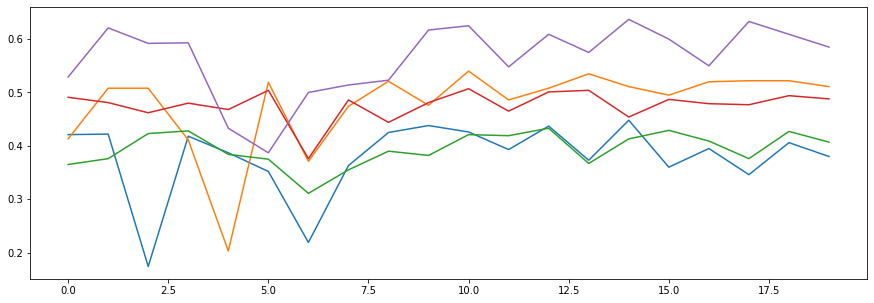

In [ ]:
plt.figure(figsize=(15, 5))
for i in range(0,len(scores_list)):
  plt.plot(scores_list[i])
plt.show()

Por otro lado al intentar modificar el tamaño de lote muestra mas varainza en sus resultados, pues se puede observar que puede drasticamente impactar el resultado de forma negativa, pero es dificil de que este parametro mejore el modelo. Un numero grande de lotes muestra una mejor estabilidad en los resultados.